<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

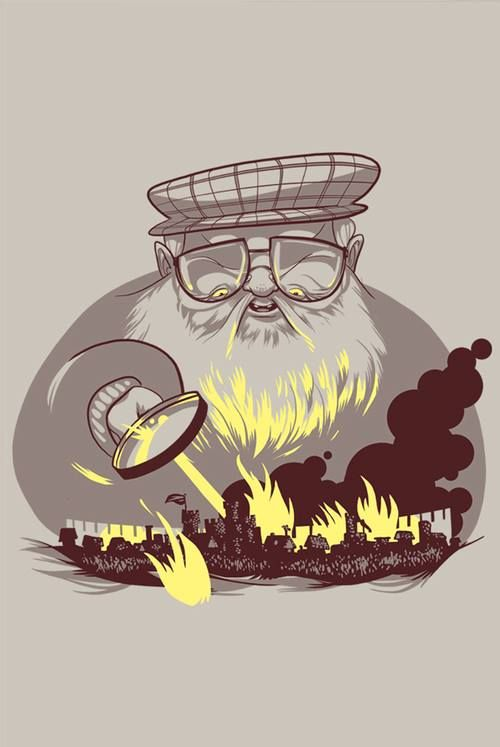

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 37.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 61.8MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
# ...
import pandas as pd
from numpy import zeros as zero_array
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
absolute_row_data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

In [5]:
absolute_row_data.title.value_counts()[:35]

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [6]:
# print(row_data[(row_data.isna()['title'] == True)]['house'].value_counts().head(25))
# print(row_data[(row_data.isna()['title'] == True)]['isAlive'].value_counts())

# row_data[row_data.isna()['age'] == True]['dateOfBirth'].value_counts() # check maybe someone has date of birth and then we would calculate age. But :(
row_data = absolute_row_data.drop(['mother', 'father', 'heir', 'isAliveMother', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth'], axis= 1)

row_data['title'].fillna('ordinary', inplace=True)
row_data['culture'].fillna('unknown', inplace=True)
# from spouse it could be extracted the name of house
row_data['house'].fillna('unknown', inplace=True)
row_data['age'].fillna('unknown', inplace=True)
row_data['spouse'].fillna('unknown', inplace=True)


<ipython-input-6-a171db5878db>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  row_data['title'].fillna('ordinary', inplace=True)
<ipython-input-6-a171db5878db>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
row_data.isna().sum()

,0
name,0
title,0
male,0
culture,0
house,0
spouse,0
book1,0
book2,0
book3,0
book4,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
# row_data.loc[row_data['popularity'] > 0.5, 'popularity'] = 1
# row_data.loc[row_data['popularity'] < 0.5, 'popularity'] = 0
# row_data.rename(columns = {'popularity' : 'isPopular'}, inplace= True)

row_data['isPopular'] = row_data['popularity'].apply(func= lambda x: 1 if x > 0.5 else 0)
row_data.drop(columns='popularity', inplace=True)

In [9]:
row_data['boolDeadRelations'] = row_data['numDeadRelations'].apply(func= lambda x: 1 if x > 0 else 0)
row_data.drop(columns='numDeadRelations', inplace=True)

In [10]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

replacing_cultures = { value: key for key, list_vals in cult.items() for value in list_vals }

In [11]:
row_data['culture'].replace(replacing_cultures, inplace=True)
row_data['culture'].value_counts()

<ipython-input-11-589d804bc06d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  row_data['culture'].replace(replacing_cultures, inplace=True)


,count
culture,
unknown,1069
Northmen,103
Ironborn,91
Free Folk,46
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [12]:
# data.drop(columns=[...], inplace = True)

In [13]:
row_data['house_spouse'] = row_data.loc[row_data['spouse'] != 'unknown', 'spouse'].apply(lambda x: 'House ' + x.split()[-1] if len(x.split()) > 1 else 'unknown')
row_data['house_spouse'].fillna('unknown', inplace=True)
row_data.drop(labels='spouse', axis=1, inplace=True)
row_data.loc[row_data['house'] == 'unknown', 'house'] = row_data.loc[(row_data['house'] == 'unknown'), 'name']\
                                                                .apply(func= lambda x: 'House ' + x.split()[-1] if len(x.split()) > 1 else 'unknown')
row_data.drop(labels='name', axis = 1, inplace=True)

<ipython-input-13-301c0cdd6c6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  row_data['house_spouse'].fillna('unknown', inplace=True)


In [14]:
v1 = row_data[(row_data['house_spouse'] == 'unknown') & (row_data['isMarried'] == 1) ]
v2 = row_data[(row_data['house_spouse'] == 'unknown') & (row_data['isMarried'] == 0) ]
v3 = row_data[(row_data['house_spouse'] != 'unknown') & (row_data['isMarried'] == 1) ]
a1 = row_data[(row_data['isMarried'] == 1)]
a2 = row_data[(row_data['isMarried'] == 0)]
c1= row_data[(row_data['house_spouse'] == 'unknown')]

print('Unknown & not married', len(v2.index))
print('Not married', len(a2.index))
print('Unknown', len(c1))
print()
print('Unknown & married', len(v1.index))
print('Known &  married',len(v3.index))
print('Married',len(a1.index))
# We could notice the data of 'isMarried' looks like the data of 'house_spouse'. We can drop one of these columns

Unknown & not married 1357
Not married 1357
Unknown 1371

Unknown & married 14
Known &  married 186
Married 200


In [15]:
row_data.drop(labels='isMarried', axis=1, inplace=True)

In [16]:
old_title = row_data.title.value_counts()
old_title[:30]

,count
title,
ordinary,840
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9


In [17]:
new_title = row_data['title'].apply(func=lambda x: x.split()[0] if len(x.split()) > 1 else x)
new_title.value_counts()[:30]

,count
title,
ordinary,840
Ser,306
Lord,63
Maester,29
Archmaester,21
Septon,16
Winterfell,15
Prince,14
King,14


In [18]:
row_data.title = new_title
v = row_data['title'].value_counts()

nice_title = v[v > 1].index
unrespectable_title = v[v == 1].index

In [19]:
unrespectable_title # There are 'wierd' and no-respectable titles which generally has one person in it

Index(['Runestone', 'Volmark', 'Tradesman-Captain', 'Greenshield', 'Mistress',
       'Ghost', 'Wyndhall', 'CastellanCommander', 'Shatterstone', 'Magister',
       'Serthe', 'Sandstone', 'Rills', 'Hightower', 'Banefort', 'Chief', 'The',
       'Longsister', 'Cobblecat', 'Rain', 'Foamdrinker',
       'Eastwatch-by-the-Sea', 'Light', 'Nightsong', 'Commander', 'master',
       'Protector', 'Maidenpool', 'Dragonstone', 'Grey', 'Sealskin', 'Salt',
       'Ten', 'Acorn', 'Kayce', 'Deepwood', 'Crakehall', 'Rook's', 'Fair',
       'Lordsport', 'Undergaoler', 'Coldwater', 'Oarmaster', 'Feastfires',
       'Heart's', 'Harridan', 'Strongsong', 'Ironoaks', 'Claw', 'Hornvale',
       'Whitewalls', 'Brightwater', 'Broad', 'LadyQueen', 'Wind',
       'BrotherProctor', 'Uplands', 'Seagard', 'QueenBlack', 'Blue', 'Goodman',
       'LadyQueenDowager', 'Seneschal', 'PrincessSepta', 'Seven', 'red',
       'Greenstone', 'Goldengrove', 'Pinkmaiden', 'Wraith', 'Godsgrace',
       'Castle', 'Widow's', 'Master

In [20]:
v[:30]

,count
title,
ordinary,840
Ser,306
Lord,63
Maester,29
Archmaester,21
Septon,16
Winterfell,15
Prince,14
King,14


In [21]:
row_data.loc[row_data['title'].isin(unrespectable_title), 'title'] = 'ordinary'

([<matplotlib.patches.Wedge at 0x788b02cd65d0>,
 [Text(-0.33738462710760164, 1.046982145688963, 'ordinary'),
  Text(-0.3563407430164362, -1.0406830808975873, 'Ser'),
  Text(0.44314822616832505, -1.0067867945319242, 'Lord'),
  Text(0.621353724350537, -0.9077001427981144, 'Maester'),
  Text(0.709613384766632, -0.8405051125127343, 'Archmaester'),
  Text(0.7703270254010741, -0.7852364446055297, 'Septon'),
  Text(0.8179046207035906, -0.7355487960915413, 'Winterfell'),
  Text(0.8595201102652917, -0.6864584328635935, 'King'),
  Text(0.8969104265063348, -0.6368294016643898, 'Prince'),
  Text(0.9302561248963406, -0.5870464565030984, 'Lady'),
  Text(0.9553901210156881, -0.5451877811044823, 'Princess'),
  Text(0.9745563939914952, -0.5101370746478772, 'Septa'),
  Text(0.9914780474467448, -0.4764150306520467, 'Cupbearer'),
  Text(1.0045385277470058, -0.44822131394198356, 'Grand'),
  Text(1.014238540277978, -0.4258170774109423, 'Master'),
  Text(1.0226233095038848, -0.4052672782983129, 'Khal'),
  Te

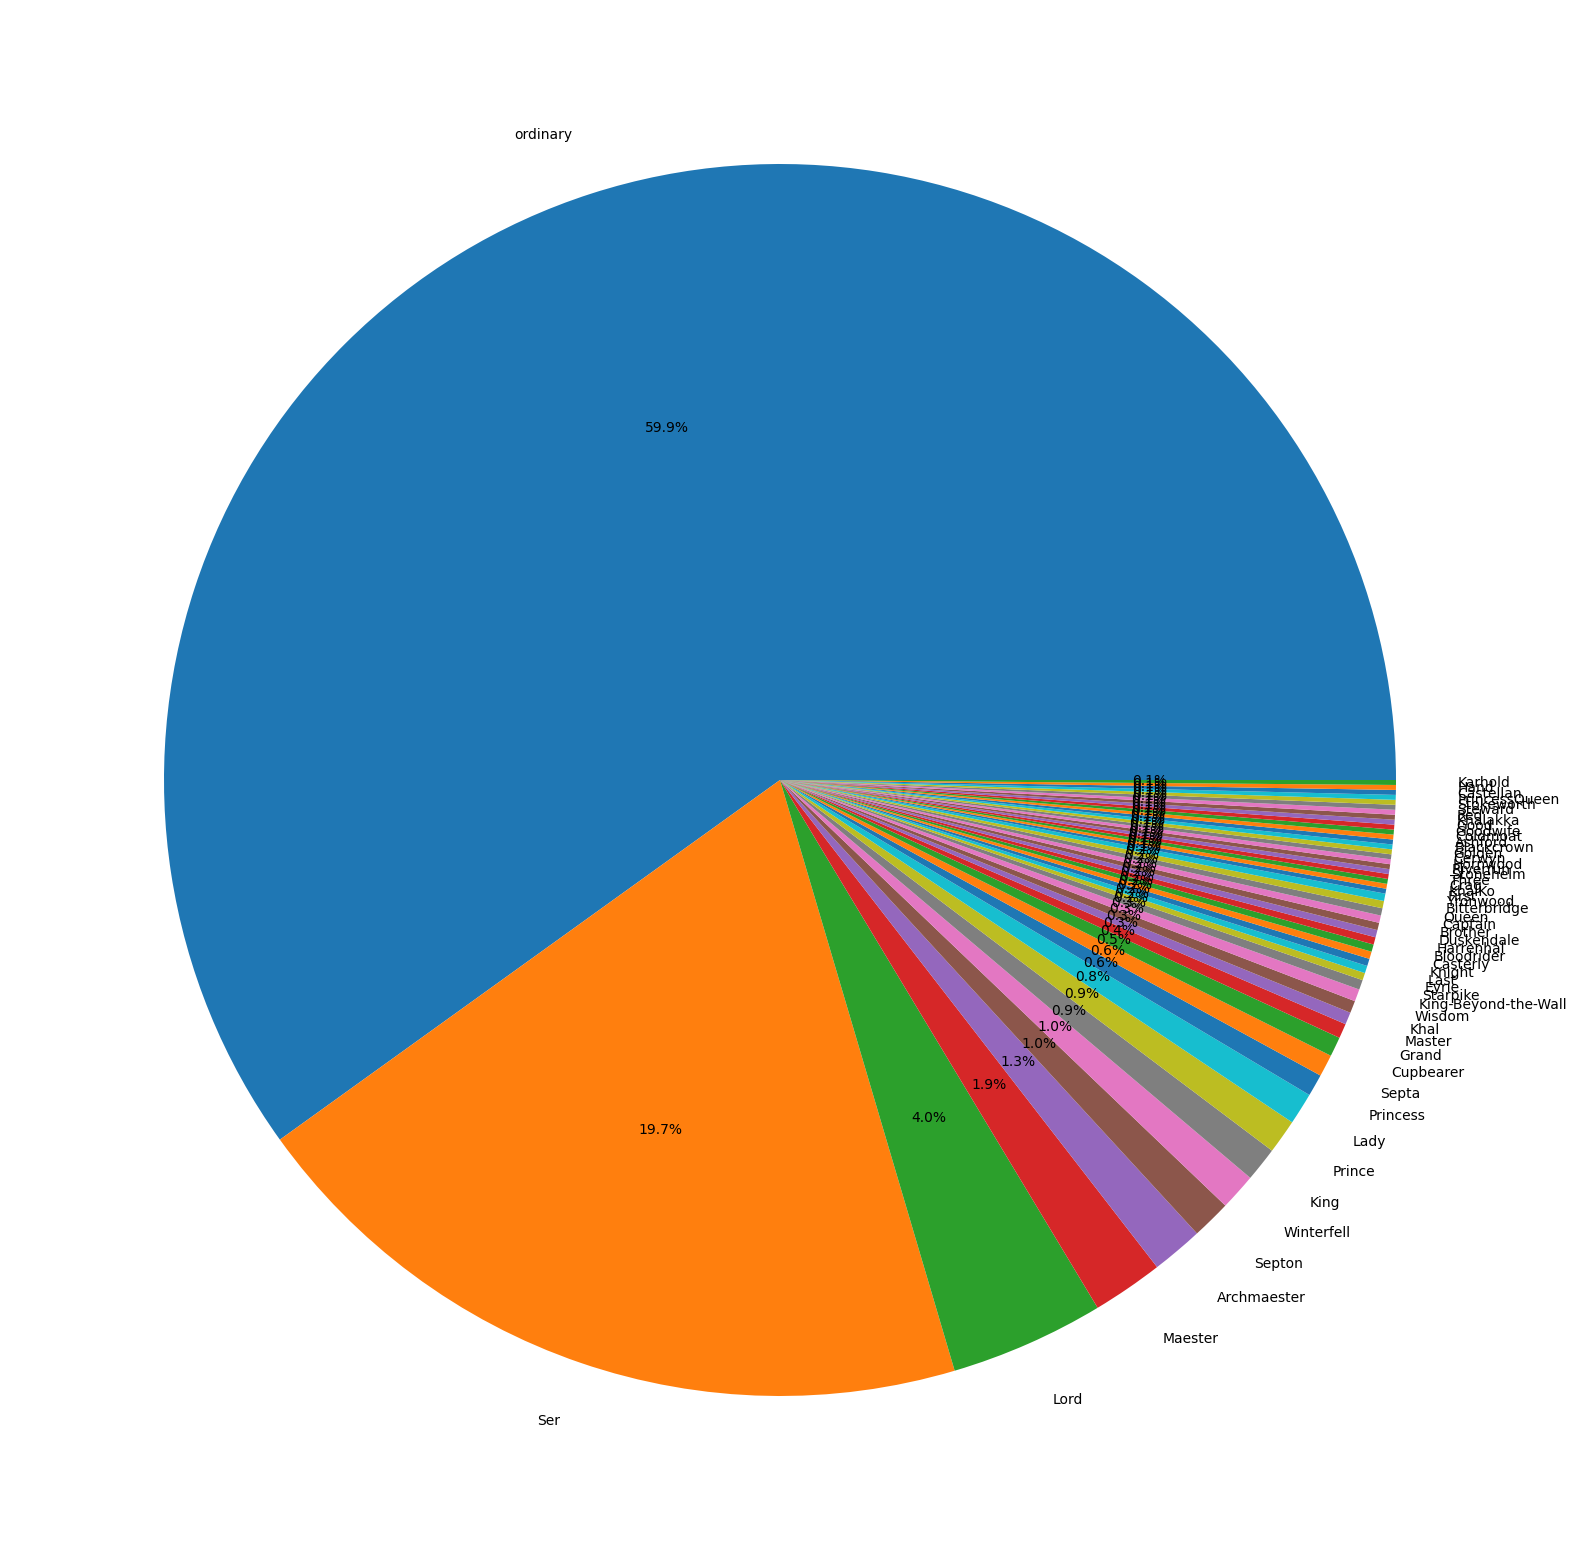

In [22]:
from time import pthread_getcpuclockid

data1 = row_data.loc[row_data['title'].isin(unrespectable_title), 'title']

plt.figure(figsize=(20,20))
plt.pie(row_data['title'].value_counts(), labels=row_data['title'].value_counts().index, autopct='%1.1f%%')
# plt.pie(data1.value_counts(), labels=data1.value_counts().index, autopct='%1.1f%%')

# row_data[row_data['title'] == 'Hayford']

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

([<matplotlib.patches.Wedge at 0x788b003b6950>,
 [Text(-0.5595824663363685, 0.9470308671679647, '0'),
  Text(0.5595823776689375, -0.947030919559852, '1')],
 [Text(-0.30522679981983736, 0.5165622911825262, '67.0%'),
  Text(0.30522675145578404, -0.5165623197599192, '33.0%')])

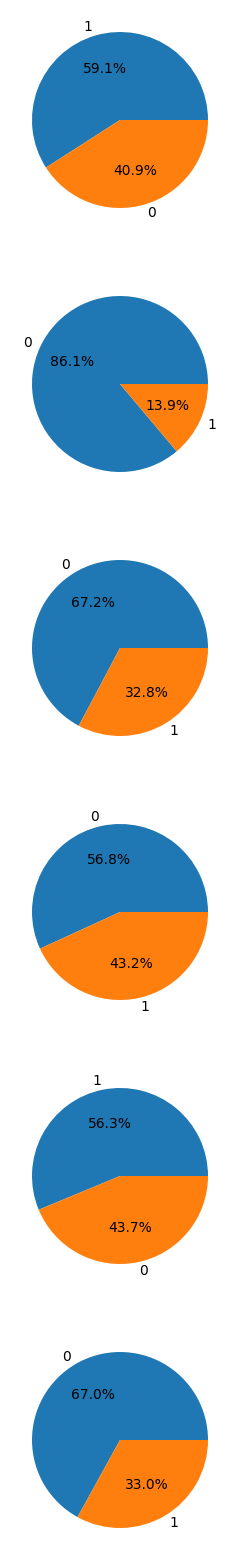

In [23]:
# Target is categorical, two cases: 0 - not alive, 1 - alive

male_data = row_data.male.value_counts()
book1_data = row_data.book1.value_counts()
book2_data = row_data.book2.value_counts()
book3_data = row_data.book3.value_counts()
book4_data = row_data.book4.value_counts()
book5_data = row_data.book5.value_counts()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(30, 20))

ax1.pie(x = male_data, labels=male_data.index, autopct='%1.1f%%')

ax2.pie(x = book1_data, labels=book1_data.index, autopct='%1.1f%%')
ax3.pie(x = book2_data, labels=book2_data.index, autopct='%1.1f%%')
ax4.pie(x = book3_data, labels=book3_data.index, autopct='%1.1f%%')
ax5.pie(x = book4_data, labels=book4_data.index, autopct='%1.1f%%')
ax6.pie(x = book5_data, labels=book5_data.index, autopct='%1.1f%%')

# I think it shouldn't be cut down - delete some line, cause it strongly effects whether person would dead or alive
# i.e. books I wouldn't take

([<matplotlib.patches.Wedge at 0x788b001f1f10>,
 [Text(-0.6084717918215989, 0.9163853330108536, 'unknown'),
  Text(-0.20847373473801178, -1.0800642119450052, 'Northmen'),
  Text(0.2193589097409281, -1.077906150236314, 'Ironborn'),
  Text(0.5052143650500615, -0.9771174163564292, 'Free Folk'),
  Text(0.6645637526561563, -0.8765586224865781, 'Braavosi'),
  Text(0.7766393650067228, -0.7789937719404145, 'Valyrian'),
  Text(0.8440737063250215, -0.705364854731749, 'Ghiscari'),
  Text(0.8904401208758288, -0.6458454854952843, 'Dornish'),
  Text(0.932617493205013, -0.5832877603447528, 'Dothraki'),
  Text(0.9661952349761085, -0.5258010725640094, 'Reach'),
  Text(0.9914780125989342, -0.4764151031746031, 'Vale mountain clans'),
  Text(1.011642402129151, -0.43194866617962996, 'Rivermen'),
  Text(1.0282451074468615, -0.39078382644576326, 'Valemen'),
  Text(1.0417567730147288, -0.35318950420126993, 'Westerman'),
  Text(1.0519676141516487, -0.32150293742995295, 'Free folk'),
  Text(1.060037918435857, -

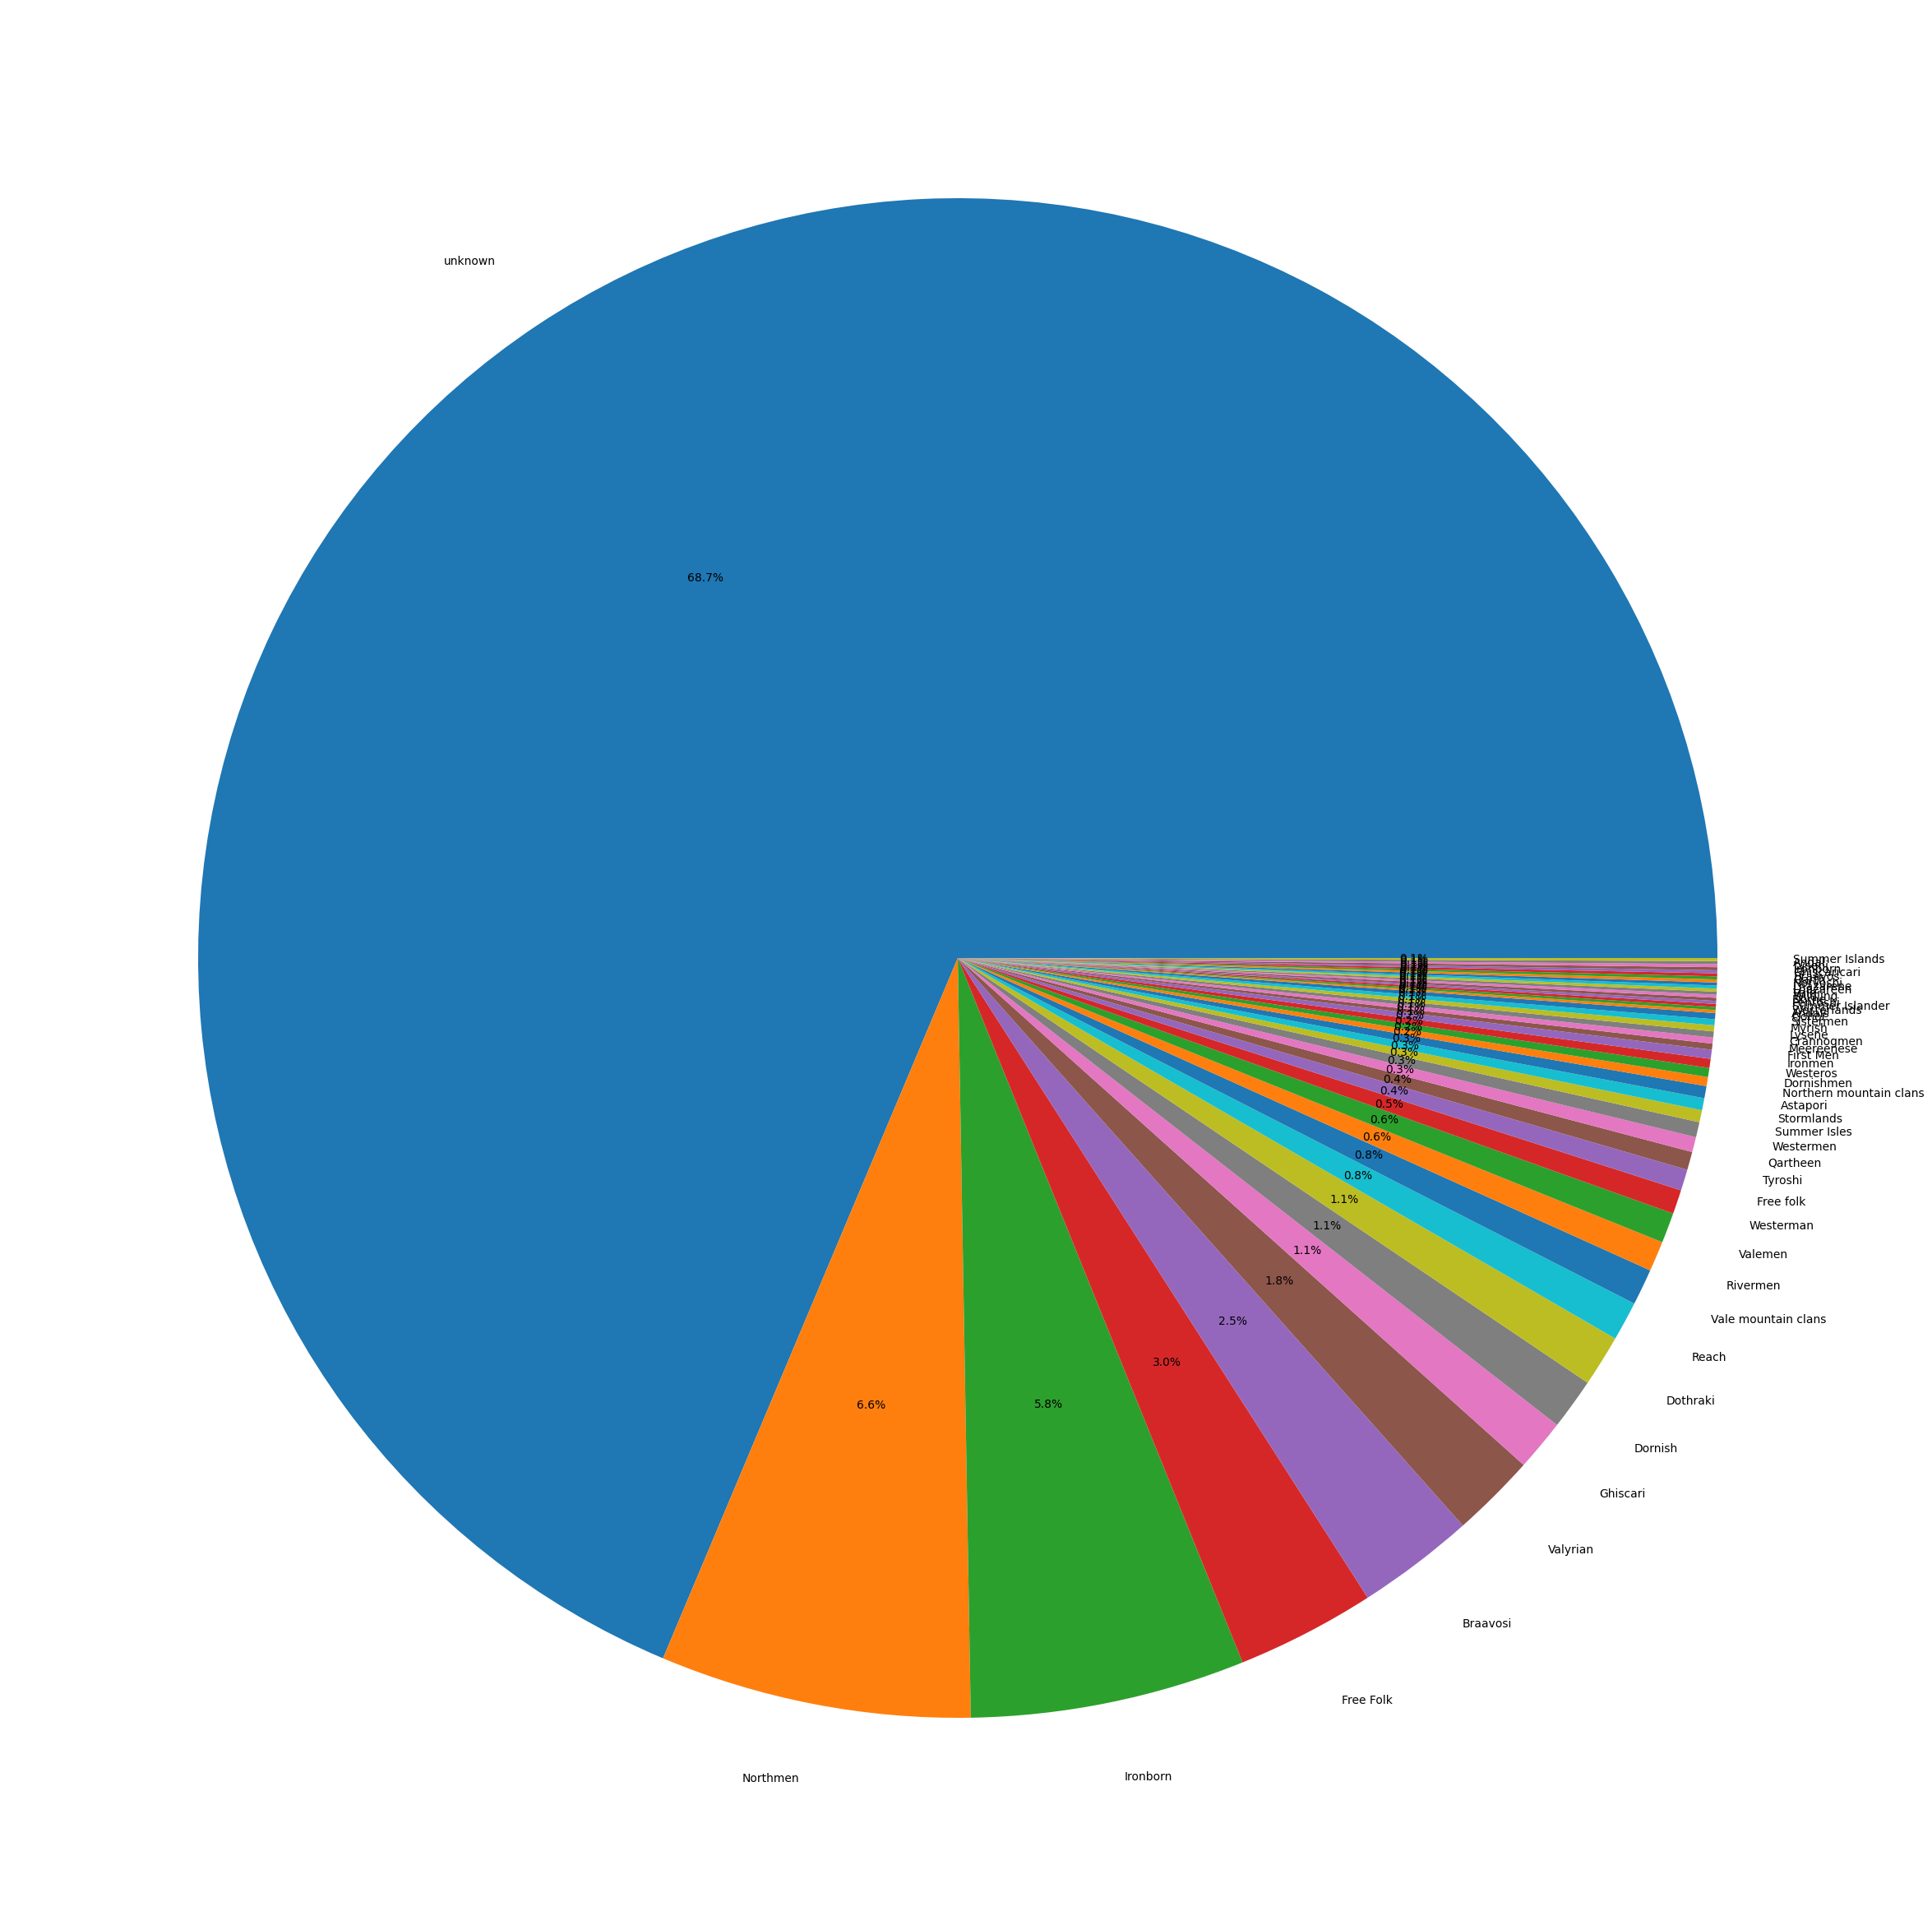

In [24]:
data2 = row_data.culture.value_counts()
respectable_culture = data2[data2 >= 3].index
# v = data2[data2 < 3]
row_data.loc[row_data['culture'].isin(data2[data2 < 3].index), 'culture'] = 'unknown'
plt.figure(figsize=(30, 30))
plt.pie(data2, autopct='%1.1f%%', labels=data2.index)

In [25]:
data_age = row_data[row_data.age == 'unknown'].age.count()
data_age / row_data.age.count()

0.8208092485549133

Text(0.5, 1.0, 'Alive')

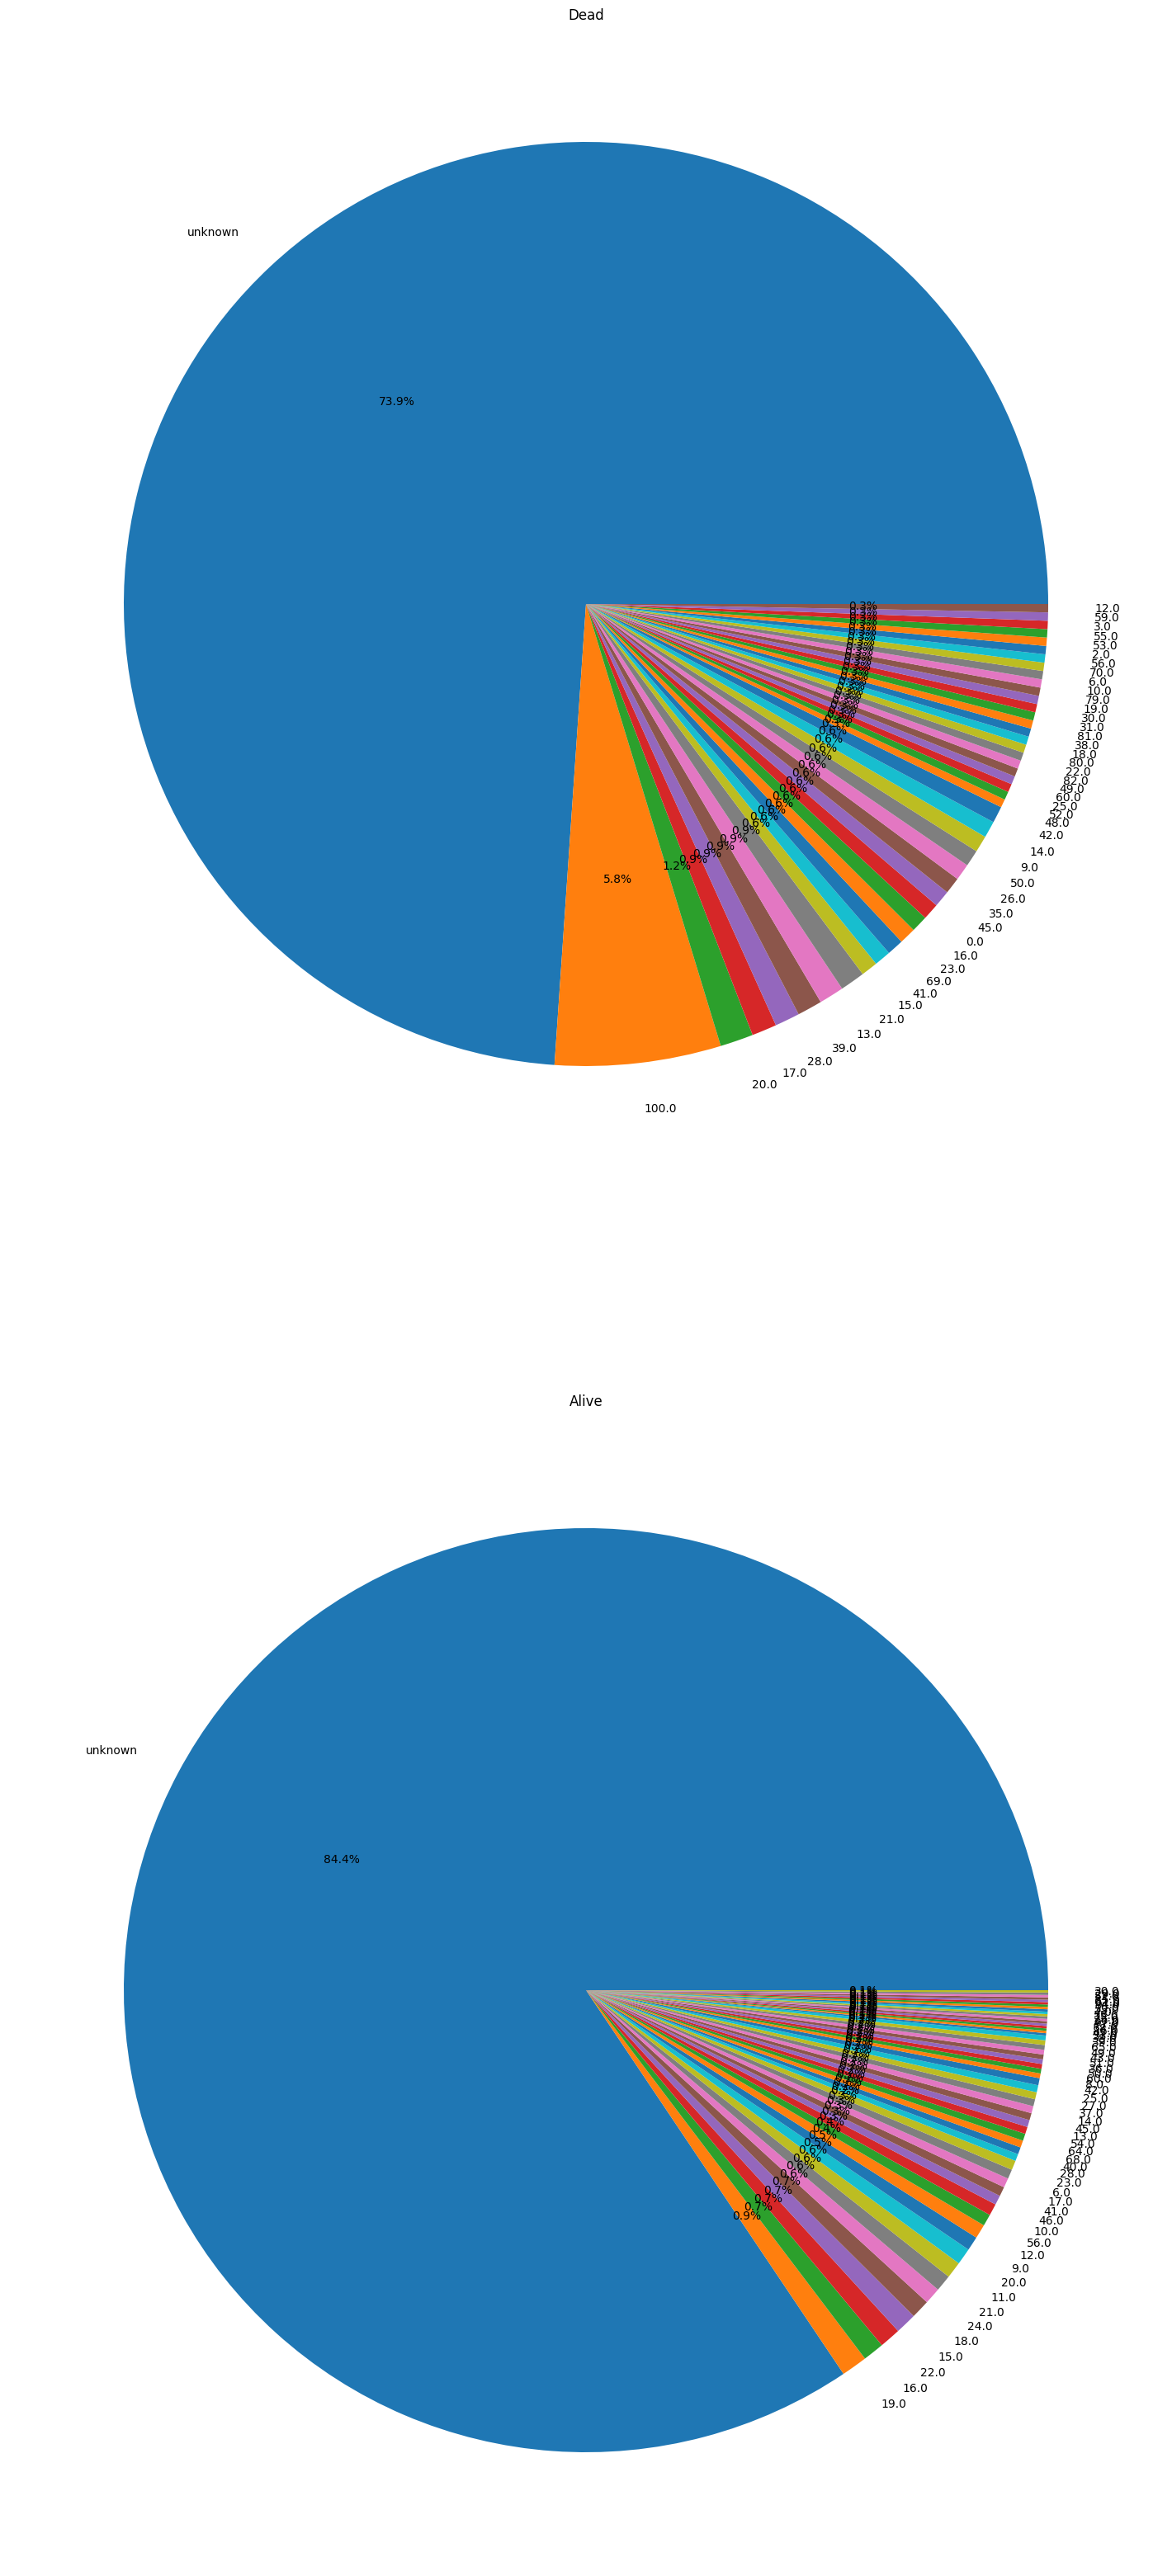

In [26]:
# row_data.age.replace('unknown', -1, inplace=True)
# age_dead = row_data.loc[row_data.isAlive == 0, 'age']
# age_alive = row_data.loc[row_data.isAlive == 1, 'age']

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (40, 40))
# ax1.barh(y= age_dead.index, width = age_dead.value_counts())
# ax1.set_title('Dead')
# ax2.hist(age_alive.value_counts())
# ax2.set_title('Alive')

# ---------With pies-----------#
age_dead = row_data.loc[row_data.isAlive == 0, 'age']
age_alive = row_data.loc[row_data.isAlive == 1, 'age']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (40, 40))
ax1.pie(x = age_dead.value_counts(), labels= age_dead.value_counts().index, autopct='%1.1f%%')
ax1.set_title('Dead')
ax2.pie(x = age_alive.value_counts(), labels= age_alive.value_counts().index, autopct='%1.1f%%')
ax2.set_title('Alive')

In [27]:
row_data.drop(labels = 'age', axis = 1, inplace=True)

# Very few people have age ~18%. It is numeric feature and we couldn't set there 'unknown'. Calculating mean age or sth else is not an option.
# So drop this column
# We could replace 'unknown' == NaN with 0, for example. For learning model it means that all of them are equalm exactly with feature 'age'.
# But it doesn't change anything, the age distributions ('dead' or 'alive') are generally equally. 'Dead' only differs in age=100 that has a logical explanation

In [28]:
row_data.isNoble.value_counts()

,count
isNoble,
0,873
1,684


In [29]:
row_data.isPopular.value_counts()

,count
isPopular,
0,1530
1,27


In [30]:
row_data.boolDeadRelations.value_counts()

,count
boolDeadRelations,
0,1488
1,69


In [31]:
# row_data.house.value_counts()[85:120]

new_value = row_data.house.value_counts()
house_value = new_value
print('Part of family houses with 1 person in it: ', len(new_value[house_value == 1].index) / len(new_value.index))

# print('houses', len(house_value.index))

# print('<2', len(house_value[house_value < 2].index))

# print('unknown COUNT', house_value.iloc[0])
# print(len(row_data.house_spouse.value_counts().index))
# print(len(row_data.culture.value_counts().index))
# print(len(row_data.title.value_counts().index))

# plt.figure(figsize = (30, 20))
# plt.pie(x=house_value, labels=house_value.index, autopct='%1.1f%%')

Part of family houses with 1 person in it:  0.5644768856447688


In [32]:
# Generally dataset is not balanced in relative with columns 'boolDeadRelations', 'isPopular' or houses....

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [33]:
row_data.loc[row_data['title'] == 'Ser', 'isAlive'].value_counts()

,count
isAlive,
1,237
0,69


In [34]:
row_data.loc[row_data['title'] == 'King', 'isAlive'].value_counts()

,count
isAlive,
1,13
0,1


In [35]:
data = row_data.house_spouse.value_counts()
print('number of unrespectable houses, i.e. people number: ', len(data[data == 1].index))
print('Count of all houses:', len(data.index))
print('Count of people:', data.sum())
# Houses of spouse also must be replaced

number of unrespectable houses, i.e. people number:  61
Count of all houses: 90
Count of people: 1557


In [36]:

houses = row_data['house'].value_counts()
houses_spouse = row_data.house_spouse.value_counts()

unrespectable_houses = houses[houses == 1].index
respectable_houses = houses[houses > 1].index
unrespectable_houses_spouse = houses_spouse[houses_spouse == 1].index
respectable_houses_spouse = houses_spouse[houses_spouse > 1].index

row_data.loc[row_data['house'].isin(unrespectable_houses), 'house'] = 'unknown'
row_data.loc[row_data.house_spouse.isin(unrespectable_houses_spouse), 'house_spouse'] = 'unknown'

# # Cut the number of houses

# # c = row_data.count()[0]
# # print(v[v == 1].sum())
# # print(len(v.index))

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
one_hot_encoder1 = OneHotEncoder(sparse_output=False)
one_hot_encoder2 = OneHotEncoder(sparse_output=False)

row_data.house = label_encoder.fit_transform(row_data.house)
row_data.house_spouse = label_encoder.fit_transform(row_data.house_spouse)

In [38]:
hot_encoded_title = one_hot_encoder1.fit_transform(row_data[['title']])
title_data = pd.DataFrame(hot_encoded_title, columns= one_hot_encoder1.get_feature_names_out(['title']), index=row_data.index)
hot_encoded_culture = one_hot_encoder2.fit_transform(row_data[['culture']])
culture_data = pd.DataFrame(hot_encoded_culture, columns=one_hot_encoder2.get_feature_names_out(['culture']), index = row_data.index)

encoded_data = pd.concat([row_data, title_data, culture_data], axis= 1).drop(labels=['title', 'culture'], axis= 1)

In [39]:
# !pip install scikit-learn --upgrade --dry-run

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

([<matplotlib.patches.Wedge at 0x788afe0ff690>,
 [Text(-0.9605097031967506, 0.536116694447105, ''),
  Text(0.9605097031967504, -0.5361166944471051, '')],
 [Text(-0.5239143835618638, 0.29242728788023903, '83.8%'),
  Text(0.5239143835618638, -0.29242728788023914, '16.2%')])

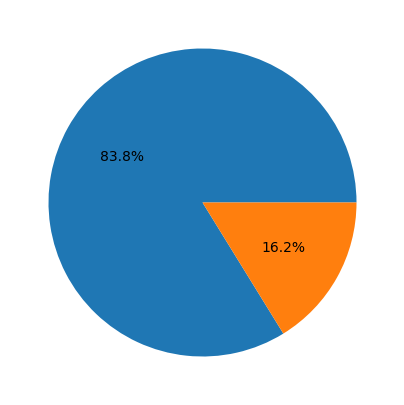

In [40]:
encoded_data.house.value_counts().index
data_ = encoded_data[encoded_data.house == 178] # it is 'unknown'

plt.figure(figsize=(5, 5))
plt.pie(data_.isAlive.value_counts(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x788afe166510>,
 [Text(-1.0350974285586076, 0.3722543665175178, ''),
  Text(1.0350974372718493, -0.3722543422893142, '')],
 [Text(-0.564598597395604, 0.20304783628228243, '89.0%'),
  Text(0.5645986021482814, -0.20304782306689864, '11.0%')])

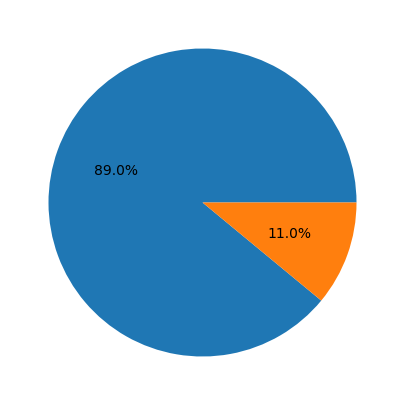

In [41]:
encoded_data.house.value_counts().index
data_ = encoded_data[encoded_data.house == 58] # It is unknown

plt.figure(figsize=(5, 5))
plt.pie(data_.isAlive.value_counts(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x788afdc88990>,
 [Text(-0.23382180021085588, 1.0748615565486352, ''),
  Text(0.23382180021085577, -1.0748615565486352, '')],
 [Text(-0.12753916375137592, 0.586288121753801, '56.8%'),
  Text(0.12753916375137586, -0.586288121753801, '43.2%')])

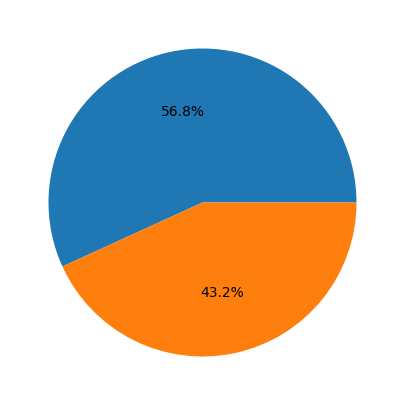

In [42]:
encoded_data.house.value_counts().index
data_ = encoded_data[encoded_data.house == 174]

plt.figure(figsize=(5, 5))
plt.pie(data_.isAlive.value_counts(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x788afdcc6110>,
 [Text(-0.8174592712713289, 0.7360437078139775, ''),
  Text(0.8174592368146356, -0.7360437460820067, '')],
 [Text(-0.44588687523890663, 0.40147838608035136, '76.7%'),
  Text(0.44588685644434667, -0.4014784069538218, '23.3%')])

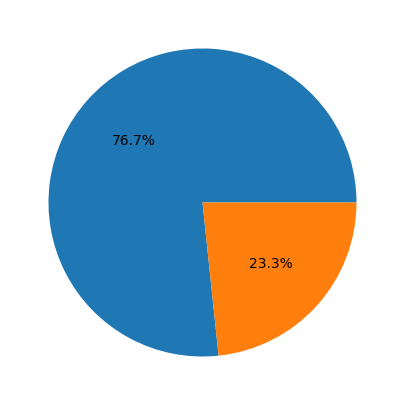

In [43]:
encoded_data.house.value_counts().index
data_ = encoded_data[encoded_data.house == 132]

plt.figure(figsize=(5, 5))
plt.pie(data_.isAlive.value_counts(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x788afdd02c10>,
 [Text(-0.6540964894588661, 0.8843968467139555, ''),
  Text(0.6540964894588661, -0.8843968467139556, '')],
 [Text(-0.35677990334119963, 0.4823982800257938, '70.3%'),
  Text(0.35677990334119963, -0.4823982800257939, '29.7%')])

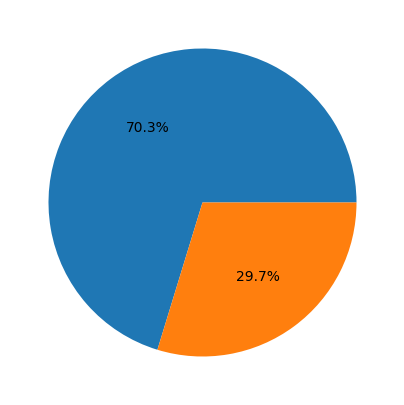

In [44]:
encoded_data.house.value_counts().index
data_ = encoded_data[encoded_data.house == 84]

plt.figure(figsize=(5, 5))
plt.pie(data_.isAlive.value_counts(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x788afdce8a90>,
 [Text(-0.8913127159822269, 0.6446407079361233, ''),
  Text(0.8913127763378417, -0.6446406244854018, '')],
 [Text(-0.4861705723539419, 0.3516222043287945, '80.1%'),
  Text(0.4861706052751863, -0.35162215881021913, '19.9%')])

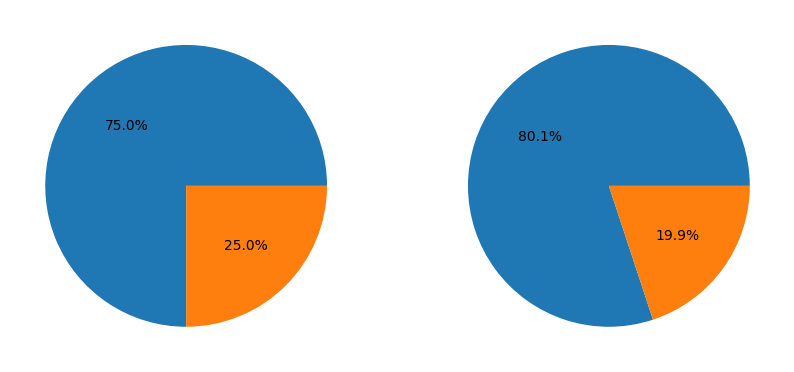

In [45]:
encoded_data.house.value_counts().index
data_1 = encoded_data.loc[(encoded_data.isNoble == 1), 'isAlive']
data_2 = encoded_data.loc[(encoded_data.isNoble == 0), 'isAlive']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.pie(data_1.value_counts(), autopct='%1.1f%%')
ax2.pie(data_2.value_counts(), autopct='%1.1f%%')

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [46]:
x = encoded_data.drop(labels='isAlive', axis=1)
y = encoded_data['isAlive']

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [50]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [51]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [52]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(x_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_logistic = logistic_regression.predict(x_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [53]:
# Шаг 1. создание модели

grid_params_decision={
    'max_depth' : range(1,9),
    'min_samples_leaf' : range(1, 9)
}

decision_tree = DecisionTreeClassifier()
grid_search_decision = GridSearchCV(decision_tree, grid_params_decision, refit=True)

# Шаг 2. обучение модели
grid_search_decision.fit(x_train, y_train)
best_model_decision = grid_search_decision.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_predict_decision = best_model_decision.predict(x_test)

In [54]:
# Шаг 1. создание модели

grid_params_neighbors={
    'n_neighbors' : range(5, 10)
}

neighbors_model = KNeighborsClassifier()

grid_search_neighbors = GridSearchCV(neighbors_model, grid_params_neighbors, refit=True)

# Шаг 2. обучение модели
grid_search_neighbors.fit(x_train, y_train)
best_model_decision = grid_search_neighbors.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_predict_neighbors = best_model_decision.predict(x_test)

In [55]:
# Шаг 1. создание модели

random_forest = RandomForestClassifier()

param_grid_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search_forest = GridSearchCV(random_forest, param_grid_forest, refit=True)


# Шаг 2. обучение модели
grid_search_forest.fit(x_train, y_train)
best_model_forest = grid_search_forest.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_predict_forest = best_model_forest.predict(x_test)

In [56]:
# Шаг 1. создание модели

adaBoost = AdaBoostClassifier()

param_grid_adaBoost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 1.0],
}

grid_search_adaBoost = GridSearchCV(adaBoost, param_grid_adaBoost, refit=True)


# Шаг 2. обучение модели
grid_search_adaBoost.fit(x_train, y_train)
best_model_adaBoost = grid_search_adaBoost.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_predict_adaBoost = best_model_adaBoost.predict(x_test)

In [57]:
# Шаг 1. создание модели

gauss_process = GaussianProcessClassifier()

kernel_params = [
    1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 2e10)),
    1.0 * Matern(length_scale=1.0, nu=1.5, length_scale_bounds=(1e-5, 2e10)),
    1.0 * RationalQuadratic(length_scale=1.0, length_scale_bounds=(1e-5, 2e10)),
    1.0 * DotProduct()
]

# param_grid_gauss = {
#     'kernel': kernel_params,
#     'n_restarts_optimizer': [0, 1, 2],
#     'max_iter_predict': [100, 200],
# }

# grid_search_gauss = GridSearchCV(gauss_process, param_grid_gauss)

# Шаг 2. обучение модели
# grid_search_gauss.fit(x_train, y_train)
# best_model = grid_search_gauss.best_estimator_

gauss_process.fit(x_train, y_train)

# Шаг 3. Предсказание на тестовых данных
# y_predict_gauss_process = best_model.predict(x_test)
y_predict_gauss_process = gauss_process.predict(x_test)

# With grid it takes too long time :(

In [58]:
# Шаг 1. создание модели

gauss_bias = GaussianNB()

# Шаг 2. обучение модели
gauss_bias.fit(x_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_predict_bias= gauss_bias.predict(x_test)

In [59]:
# Шаг 1. создание модели

svc = SVC()
# Шаг 2. обучение модели
svc.fit(x_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_predict_svc = svc.predict(x_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [60]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [61]:
# Шаг 3. Предсказание на тестовых данных # logisticRegerssion:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Accuracy : %.4f" % accuracy)

Logistic Accuracy : 0.7532


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [62]:
# Шаг 3. Предсказание на тестовых данных # DecisionTree:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_decision)
print("DECISION Accuracy : %.4f" % accuracy)

DECISION Accuracy : 0.7596


In [63]:
# Шаг 3. Предсказание на тестовых данных # KNeighbors:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_neighbors)
print("NEIGHBORS Accuracy : %.4f" % accuracy)

NEIGHBORS Accuracy : 0.7564


In [64]:
# Шаг 3. Предсказание на тестовых данных # RandomForest:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_forest)
print("FOREST Accuracy : %.4f" % accuracy)

FOREST Accuracy : 0.7660


In [65]:
# Шаг 3. Предсказание на тестовых данных # AdaBoost:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_adaBoost)
print("ADA BOOST Accuracy : %.4f" % accuracy)

ADA BOOST Accuracy : 0.7500


In [66]:
# Шаг 3. Предсказание на тестовых данных # GaussProcess:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_gauss_process)
print("GAUSS PROCESS Accuracy : %.4f" % accuracy)

GAUSS PROCESS Accuracy : 0.7628


In [67]:
# Шаг 3. Предсказание на тестовых данных # GaussNB:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_bias)
print("GAUSS BIAS Accuracy : %.4f" % accuracy)

GAUSS BIAS Accuracy : 0.2949


In [68]:
# Шаг 3. Предсказание на тестовых данных # SVC:
# ------I have done it yet :)-------
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_predict_svc)
print("SVC Accuracy : %.4f" % accuracy)

SVC Accuracy : 0.7564


In [69]:
# Random Forest is the best

In [70]:
best_model = best_model_forest

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [71]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.29MB/s]


In [72]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [73]:
# !cp '/content/submission.csv' -t '/content/drive/MyDrive/ml_datasets/game'

In [74]:
test_data = pd.read_csv("/content/drive/MyDrive/ml_datasets/game/game_of_thrones_test.csv", index_col='S.No')

In [75]:
test_data = test_data.drop(['mother', 'father', 'heir', 'isAliveMother', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth', 'age', 'isMarried'], axis= 1)

test_data['title'].fillna('ordinary', inplace=True)
test_data['culture'].fillna('unknown', inplace=True)

test_data['house'].fillna('unknown', inplace=True)
test_data['spouse'].fillna('unknown', inplace=True)

test_data['isPopular'] = test_data['popularity'].apply(func= lambda x: 1 if x > 0.5 else 0)
test_data.drop(columns='popularity', inplace=True)

test_data['boolDeadRelations'] = test_data['numDeadRelations'].apply(func= lambda x: 1 if x > 0 else 0)
test_data.drop(columns='numDeadRelations', inplace=True)

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

replacing_cultures = { value: key for key, list_vals in cult.items() for value in list_vals }

test_data['culture'].replace(replacing_cultures, inplace=True)

test_data['house_spouse'] = test_data.loc[test_data['spouse'] != 'unknown', 'spouse'].apply(lambda x: 'House ' + x.split()[-1] if len(x.split()) > 1 else 'unknown')
test_data['house_spouse'].fillna('unknown', inplace=True)
test_data.drop(labels='spouse', axis=1, inplace=True)
test_data.loc[test_data['house'] == 'unknown', 'house'] = test_data.loc[(test_data['house'] == 'unknown'), 'name']\
                                                                .apply(func= lambda x: 'House ' + x.split()[-1] if len(x.split()) > 1 else 'unknown')
test_data.drop(labels='name', axis = 1, inplace=True)

<ipython-input-75-5140d2b0aae7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['title'].fillna('ordinary', inplace=True)
<ipython-input-75-5140d2b0aae7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [88]:
test_data['title'] = test_data['title'].apply(func=lambda x: x.split()[0] if len(x.split()) > 1 else x)

all_title = test_data.title.unique()
unrespect_test_title = set(all_title) - set(nice_title) # nice_title from train part

test_data.loc[test_data['title'].isin(unrespect_test_title), 'title'] = 'ordinary'
missing_title = set(nice_title) - set(test_data.title.unique()) # so our model correctly work it need the same columns as train set has

all_houses = test_data.house.unique()
all_houses_spouse = test_data.house_spouse.unique()

unrespect_test_houses = set(all_houses) - set(respectable_houses) # respectable_houses from train part
unrespect_test_houses_spouse = set(all_houses_spouse) - set(respectable_houses_spouse) # respectable_houses_spouse from train part

test_data.loc[test_data['house'].isin(unrespectable_houses), 'house'] = 'unknown'
test_data.loc[test_data.house_spouse.isin(unrespectable_houses_spouse), 'house_spouse'] = 'unknown'

all_cultures = test_data.culture.unique()
unrespect_test_cultures = set(all_cultures) - set(respectable_culture) # respectable_culture from train part

test_data.loc[test_data['culture'].isin(unrespect_test_cultures), 'culture'] = 'unknown'
missing_culture = set(respectable_culture) - set(test_data.culture.unique()) # so our model correctly work it need the same columns as train set has

label_encoder = LabelEncoder()
test_data.house = label_encoder.fit_transform(test_data.house)
test_data.house_spouse = label_encoder.fit_transform(test_data.house_spouse)

one_hot_encoder1 = OneHotEncoder(sparse_output=False)
one_hot_encoder2 = OneHotEncoder(sparse_output=False)

hot_encoded_title = one_hot_encoder1.fit_transform(test_data[['title']])
hot_encoded_culture = one_hot_encoder2.fit_transform(test_data[['culture']])

arr1 = zero_array((len(test_data.index), len(missing_title)))
arr2 = zero_array((len(test_data.index), len(missing_culture)))

title_data = pd.DataFrame(hot_encoded_title, columns= one_hot_encoder1.get_feature_names_out(['title']), index=test_data.index)
title_missing_data = pd.DataFrame(arr1, columns=list(missing_title), index=test_data.index)

culture_data = pd.DataFrame(hot_encoded_culture, columns= one_hot_encoder2.get_feature_names_out(['culture']), index = test_data.index)
culture_missing_data = pd.DataFrame(arr2, columns = list(missing_culture), index=test_data.index)

def add_title(title):
  return 'title_' + title

def add_culture(culture):
  return 'culture_' + culture

title_missing_data.rename(columns = add_title, inplace=True)
culture_missing_data.rename(columns = add_culture, inplace=True)

new_data1 = pd.concat([title_data, title_missing_data], axis = 1).sort_index(axis=1)
new_data2 = pd.concat([culture_data, culture_missing_data], axis=1).sort_index(axis=1)

encoded_test_data = pd.concat([test_data, new_data1, new_data2], axis = 1).drop(labels=['title', 'culture'], axis= 1)
encoded_test_data

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(encoded_test_data)

y_pred = best_model.predict(scaled_data)

<ipython-input-88-cd70d36db13a>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data['house'].isin(unrespectable_houses), 'house'] = 'unknown'
<ipython-input-88-cd70d36db13a>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data.house_spouse.isin(unrespectable_houses_spouse), 'house_spouse'] = 'unknown'


In [89]:
submission.isAlive = y_pred

In [92]:
submission.value_counts()

,count
isAlive,
1,363
0,26


Как сохранить измененный Pandas DataFrame в csv файл:

In [90]:
submission.to_csv("/content/new_submission.csv", index=False)